## Bootstrap confidence intervals

In [7]:
#Resampling engine

import numpy as np
print(np.random.choice([1,2,3,4,5], size = 5))



#bs_sample = np.random.choice(michelson_speed_of_light, size=100)

#np.mean(bs_sample)
299847.79999999999
#np.std(bs_sample)
83.564286025729331

[4 4 1 3 5]


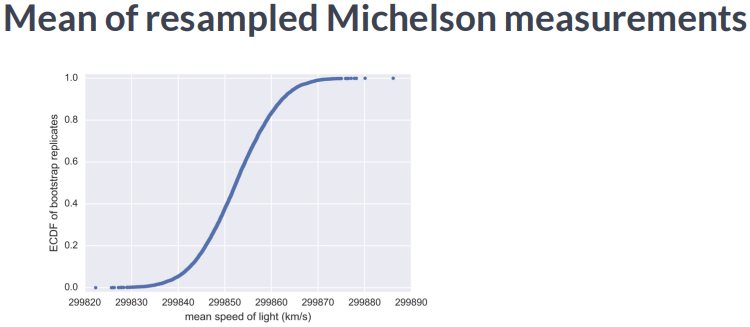

bootstrap replicate? = A single value of a statistic computed from a bootstrap sample

Bootstrapping by hand
To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

In [ ]:
There are 27 unique samples, and the maximum mean is 1.

There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.

[ 875.5  648.2  788.1  940.3  491.1  743.5  730.1  686.5  878.8  865.6
  654.9  831.5  798.1  681.8  743.8  689.1  752.1  837.2  710.6  749.2
  967.1  701.2  619.   747.6  803.4  645.6  804.1  787.4  646.8  997.1
  774.   734.5  835.   840.7  659.6  828.3  909.7  856.9  578.3  904.2
  883.9  740.1  773.9  741.4  866.8  871.1  712.5  919.2  927.9  809.4
  633.8  626.8  871.3  774.3  898.8  789.6  936.3  765.4  882.1  681.1
  661.3  847.9  683.9  985.7  771.1  736.6  713.2  774.5  937.7  694.5
  598.2  983.8  700.2  901.3  733.5  964.4  609.3 1035.2  718.   688.6
  736.8  643.3 1038.5  969.   802.7  876.6  944.7  786.6  770.4  808.6
  761.3  774.2  559.3  674.2  883.6  823.9  960.4  877.8  940.6  831.8
  906.2  866.5  674.1  998.1  789.3  915.   737.1  763.   666.7  824.5
  913.8  905.1  667.8  747.4  784.7  925.4  880.2 1086.9  764.4 1050.1
  595.2  855.2  726.9  785.2  948.8  970.6  896.   618.4  572.4 1146.4
  728.2  864.2  793. ]
[ 875.5  648.2  788.1  940.3  491.1  743.5  730.1  686

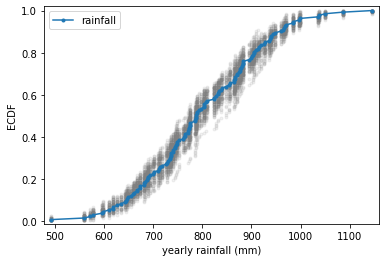

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

a =[875.5, 648.2, 788.1, 940.3000000000001, 491.09999999999997, 743.5, 730.1, 686.4999999999999, 878.8, 865.5999999999999, 654.9, 831.4999999999999, 798.1, 681.8000000000001, 743.8, 689.1, 752.1, 837.2, 710.5999999999999, 749.1999999999999, 967.0999999999999, 701.1999999999999, 619.0, 747.5999999999999, 803.4, 645.6, 804.1, 787.4, 646.8, 997.0999999999999, 774.0, 734.5, 835.0, 840.7000000000002, 659.5999999999999, 828.3, 909.7, 856.9000000000001, 578.3000000000001, 904.2, 883.9, 740.0999999999999, 773.9, 741.4000000000001, 866.8000000000001, 871.1, 712.5, 919.1999999999999, 927.9, 809.4, 633.8, 626.8000000000001, 871.3, 774.2999999999998, 898.8, 789.5999999999999, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9, 683.9, 985.6999999999999, 771.1, 736.6, 713.2, 774.5, 937.6999999999999, 694.5000000000001, 598.2, 983.8, 700.1999999999999, 901.2999999999998, 733.4999999999999, 964.4, 609.3, 1035.2, 717.9999999999999, 688.6, 736.8000000000001, 643.3, 1038.5, 968.9999999999999, 802.7, 876.5999999999998, 944.7, 786.5999999999999, 770.4, 808.6, 761.3, 774.1999999999999, 559.3000000000001, 674.1999999999999, 883.6, 823.9, 960.3999999999999, 877.8000000000002, 940.6, 831.8000000000001, 906.2, 866.5, 674.0999999999999, 998.1000000000001, 789.3000000000001, 915.0, 737.1, 762.9999999999999, 666.6999999999999, 824.5, 913.8, 905.0999999999999, 667.8, 747.4000000000001, 784.6999999999999, 925.4000000000001, 880.2, 1086.8999999999999, 764.3999999999999, 1050.1000000000001, 595.1999999999999, 855.2000000000002, 726.9, 785.1999999999999, 948.8, 970.6, 896.0, 618.4000000000001, 572.4, 1146.4, 728.1999999999999, 864.1999999999998, 793.0]

rainfall = np.array(a)
np.savetxt("rainfall.csv", rainfall, delimiter= ",")

# np.genfromtxt("rainfall.csv", delimiter=",") aslo work fine
from numpy import genfromtxt
my_data = genfromtxt("rainfall.csv", delimiter=",") #from save file in C:\user\
type(my_data)
print(my_data)
print(rainfall)
print(my_data == rainfall)



for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1, )

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.', label = 'rainfall')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc="best")
# Show the plot
plt.show()








## Bootstrap confidential intervals

In [ ]:
import numpy as np

def bootstrap_replicate_1d(data, func):
"""Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# example :   bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

#Many bootstrap replicates

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)


Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the [standard error of the mean], or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, [sem = np.std(data) / np.sqrt(len(data)).] Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall

**** It's exactly what it says. [Probability density.] I find it very intuitive. You could start with the discrete version, PDF with respect to a discrete measure for a dice has values 1/6 on 1, 2, 3, 4, 5, 6. 

lenght a : 133
lenght rainfall : 133
lenght bs_replicates : 10000
print SEM  :
10.51054915050619
std of bootstrap replicates  :
10.49950742934036


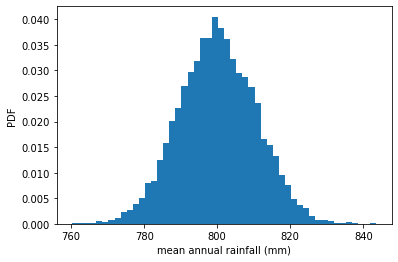

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a =[875.5, 648.2, 788.1, 940.3000000000001, 491.09999999999997, 743.5, 730.1, 686.4999999999999, 878.8, 865.5999999999999, 654.9, 831.4999999999999, 798.1, 681.8000000000001, 743.8, 689.1, 752.1, 837.2, 710.5999999999999, 749.1999999999999, 967.0999999999999, 701.1999999999999, 619.0, 747.5999999999999, 803.4, 645.6, 804.1, 787.4, 646.8, 997.0999999999999, 774.0, 734.5, 835.0, 840.7000000000002, 659.5999999999999, 828.3, 909.7, 856.9000000000001, 578.3000000000001, 904.2, 883.9, 740.0999999999999, 773.9, 741.4000000000001, 866.8000000000001, 871.1, 712.5, 919.1999999999999, 927.9, 809.4, 633.8, 626.8000000000001, 871.3, 774.2999999999998, 898.8, 789.5999999999999, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9, 683.9, 985.6999999999999, 771.1, 736.6, 713.2, 774.5, 937.6999999999999, 694.5000000000001, 598.2, 983.8, 700.1999999999999, 901.2999999999998, 733.4999999999999, 964.4, 609.3, 1035.2, 717.9999999999999, 688.6, 736.8000000000001, 643.3, 1038.5, 968.9999999999999, 802.7, 876.5999999999998, 944.7, 786.5999999999999, 770.4, 808.6, 761.3, 774.1999999999999, 559.3000000000001, 674.1999999999999, 883.6, 823.9, 960.3999999999999, 877.8000000000002, 940.6, 831.8000000000001, 906.2, 866.5, 674.0999999999999, 998.1000000000001, 789.3000000000001, 915.0, 737.1, 762.9999999999999, 666.6999999999999, 824.5, 913.8, 905.0999999999999, 667.8, 747.4000000000001, 784.6999999999999, 925.4000000000001, 880.2, 1086.8999999999999, 764.3999999999999, 1050.1000000000001, 595.1999999999999, 855.2000000000002, 726.9, 785.1999999999999, 948.8, 970.6, 896.0, 618.4000000000001, 572.4, 1146.4, 728.1999999999999, 864.1999999999998, 793.0]
print('lenght a :', len(a))
rainfall = np.array(a)
print('lenght rainfall :', len(rainfall))


def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)
print('lenght bs_replicates :', len(bs_replicates))

# Compute and print SEM : std error of mean
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print('print SEM  :')
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('std of bootstrap replicates  :')
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

 Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

Confidence intervals of rainfall data
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the[ np.percentile() ]function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is,[give the 2.5th and 97.5th]percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [8]:
#In [10]: print(np.percentile(bs_replicates, [2.5, 97.5]))
#[779.76992481 820.95043233]

print(np.percentile(bs_replicates, [2.5, 97.5]))


[779.56902256 820.58721805]


## Bootstrap replicates of other statistics

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the[ draw_bs_reps() ]function you defined a few exercises ago. It is provided below for your reference:

In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [ ]:
Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

lenght a : 133
lenght rainfall : 133


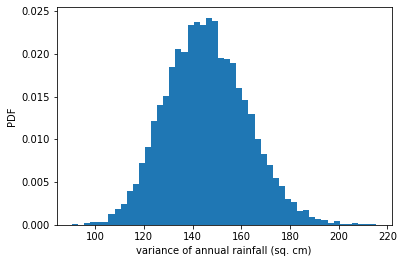

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a =[875.5, 648.2, 788.1, 940.3000000000001, 491.09999999999997, 743.5, 730.1, 686.4999999999999, 878.8, 865.5999999999999, 654.9, 831.4999999999999, 798.1, 681.8000000000001, 743.8, 689.1, 752.1, 837.2, 710.5999999999999, 749.1999999999999, 967.0999999999999, 701.1999999999999, 619.0, 747.5999999999999, 803.4, 645.6, 804.1, 787.4, 646.8, 997.0999999999999, 774.0, 734.5, 835.0, 840.7000000000002, 659.5999999999999, 828.3, 909.7, 856.9000000000001, 578.3000000000001, 904.2, 883.9, 740.0999999999999, 773.9, 741.4000000000001, 866.8000000000001, 871.1, 712.5, 919.1999999999999, 927.9, 809.4, 633.8, 626.8000000000001, 871.3, 774.2999999999998, 898.8, 789.5999999999999, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9, 683.9, 985.6999999999999, 771.1, 736.6, 713.2, 774.5, 937.6999999999999, 694.5000000000001, 598.2, 983.8, 700.1999999999999, 901.2999999999998, 733.4999999999999, 964.4, 609.3, 1035.2, 717.9999999999999, 688.6, 736.8000000000001, 643.3, 1038.5, 968.9999999999999, 802.7, 876.5999999999998, 944.7, 786.5999999999999, 770.4, 808.6, 761.3, 774.1999999999999, 559.3000000000001, 674.1999999999999, 883.6, 823.9, 960.3999999999999, 877.8000000000002, 940.6, 831.8000000000001, 906.2, 866.5, 674.0999999999999, 998.1000000000001, 789.3000000000001, 915.0, 737.1, 762.9999999999999, 666.6999999999999, 824.5, 913.8, 905.0999999999999, 667.8, 747.4000000000001, 784.6999999999999, 925.4000000000001, 880.2, 1086.8999999999999, 764.3999999999999, 1050.1000000000001, 595.1999999999999, 855.2000000000002, 726.9, 785.1999999999999, 948.8, 970.6, 896.0, 618.4000000000001, 572.4, 1146.4, 728.1999999999999, 864.1999999999998, 793.0]
print('lenght a :', len(a))
rainfall = np.array(a)
print('lenght rainfall :', len(rainfall))


def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

##  Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

In [ ]:
Generate 10000 bootstrap replicates of τ from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal τ is calculated as the mean of the data.
Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
Print the confidence interval.
Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!

lenght nohittter_times : 251
95% confidence interval = [661.61683267 871.73037849] games


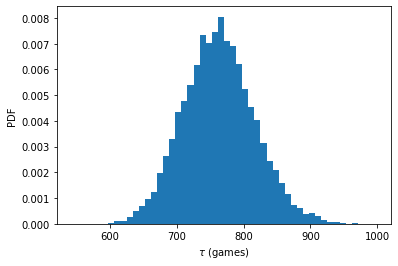

In [14]:
import numpy as np
import matplotlib.pyplot as plt

b = [843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887, 645, 2088, 42, 2090, 11, 886, 1665, 1084, 2900, 2432, 750, 4021, 1070, 1765, 1322, 26, 548, 1525, 77, 2181, 2752, 127, 2147, 211, 41, 1575, 151, 479, 697, 557, 2267, 542, 392, 73, 603, 233, 255, 528, 397, 1529, 1023, 1194, 462, 583, 37, 943, 996, 480, 1497, 717, 224, 219, 1531, 498, 44, 288, 267, 600, 52, 269, 1086, 386, 176, 2199, 216, 54, 675, 1243, 463, 650, 171, 327, 110, 774, 509, 8, 197, 136, 12, 1124, 64, 380, 811, 232, 192, 731, 715, 226, 605, 539, 1491, 323, 240, 179, 702, 156, 82, 1397, 354, 778, 603, 1001, 385, 986, 203, 149, 576, 445, 180, 1403, 252, 675, 1351, 2983, 1568, 45, 899, 3260, 1025, 31, 100, 2055, 4043, 79, 238, 3931, 2351, 595, 110, 215, 0, 563, 206, 660, 242, 577, 179, 157, 192, 192, 1848, 792, 1693, 55, 388, 225, 1134, 1172, 1555, 31, 1582, 1044, 378, 1687, 2915, 280, 765, 2819, 511, 1521, 745, 2491, 580, 2072, 6450, 578, 745, 1075, 1103, 1549, 1520, 138, 1202, 296, 277, 351, 391, 950, 459, 62, 1056, 1128, 139, 420, 87, 71, 814, 603, 1349, 162, 1027, 783, 326, 101, 876, 381, 905, 156, 419, 239, 119, 129, 467]
nohitter_times = np.array(b)
print('lenght nohittter_times :', len(nohitter_times))


def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## A function to do pairs bootstrap 

95% percentile : [0.04473281 0.05519156]


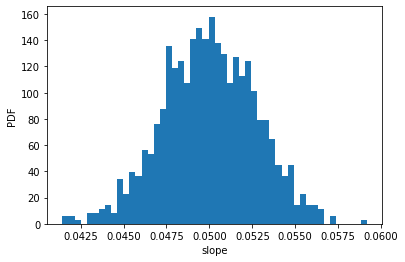

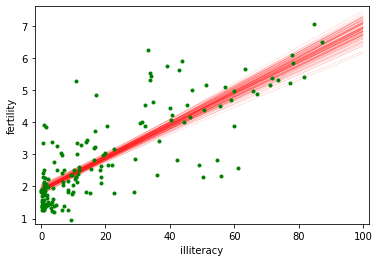

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#data acquire

ill = [9.5, 49.2, 1.0, 11.200000000000003, 9.799999999999997, 60.0, 50.2, 51.2, 0.5999999999999943, 1.0, 8.5, 6.099999999999994, 9.799999999999997, 1.0, 42.2, 77.2, 18.700000000000003, 22.799999999999997, 8.5, 43.9, 1.0, 1.0, 1.5, 10.799999999999997, 11.900000000000006, 3.4000000000000057, 0.4000000000000057, 3.0999999999999943, 6.599999999999994, 33.7, 40.4, 2.299999999999997, 17.200000000000003, 0.7000000000000028, 36.1, 1.0, 33.2, 55.9, 30.799999999999997, 87.4, 15.400000000000006, 54.6, 5.099999999999994, 1.0999999999999943, 10.200000000000003, 19.799999999999997, 0.0, 40.7, 57.2, 59.9, 3.0999999999999943, 55.7, 22.799999999999997, 10.900000000000006, 34.7, 32.2, 43.0, 1.2999999999999972, 1.0, 0.5, 78.4, 34.2, 84.9, 29.099999999999994, 31.299999999999997, 18.299999999999997, 81.8, 39.0, 11.200000000000003, 67.0, 4.099999999999994, 0.20000000000000284, 78.1, 1.0, 7.099999999999994, 1.0, 29.0, 1.0999999999999943, 11.700000000000003, 73.6, 33.900000000000006, 14.0, 0.29999999999999716, 1.0, 0.7999999999999972, 71.9, 40.1, 1.0, 2.0999999999999943, 3.799999999999997, 16.5, 4.099999999999994, 0.5, 44.4, 46.3, 18.700000000000003, 6.5, 36.8, 18.599999999999994, 11.099999999999994, 22.099999999999994, 71.1, 1.0, 0.0, 0.9000000000000057, 0.7000000000000028, 45.5, 8.400000000000006, 0.0, 3.799999999999997, 8.5, 2.0, 1.0, 58.9, 0.29999999999999716, 1.0, 14.0, 47.0, 4.099999999999994, 2.200000000000003, 7.200000000000003, 0.29999999999999716, 1.5, 50.5, 1.2999999999999972, 0.5999999999999943, 19.099999999999994, 6.900000000000006, 9.200000000000003, 2.200000000000003, 0.20000000000000284, 12.299999999999997, 4.900000000000006, 4.599999999999994, 0.29999999999999716, 16.5, 65.7, 63.5, 16.799999999999997, 0.20000000000000284, 1.7999999999999972, 9.599999999999994, 15.200000000000003, 14.400000000000006, 3.299999999999997, 10.599999999999994, 61.3, 10.900000000000006, 32.2, 9.299999999999997, 11.599999999999994, 20.700000000000003, 6.5, 6.700000000000003, 3.5, 1.0, 1.5999999999999943, 20.5, 1.5, 16.700000000000003, 2.0, 0.9000000000000057]
fer = [1.7690000000000001, 2.682, 2.077, 2.1319999999999997, 1.827, 3.872, 2.2880000000000003, 5.172999999999999, 1.393, 1.262, 2.156, 3.0260000000000002, 2.033, 1.324, 2.8160000000000003, 5.211, 2.1, 1.781, 1.8219999999999998, 5.9079999999999995, 1.881, 1.8519999999999999, 1.39, 2.281, 2.505, 1.224, 1.361, 1.4680000000000002, 2.404, 5.52, 4.058, 2.2230000000000003, 4.859, 1.2670000000000001, 2.342, 1.579, 6.254, 2.334, 3.9610000000000003, 6.505, 2.53, 2.823, 2.498, 2.248, 2.508, 3.04, 1.854, 4.22, 5.1, 4.967, 1.325, 4.513999999999999, 3.173, 2.3080000000000003, 4.62, 4.541, 5.6370000000000005, 1.926, 1.7469999999999999, 2.294, 5.841, 5.455, 7.069, 2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89, 1.385, 1.505, 6.081, 1.784, 1.3780000000000001, 1.45, 1.841, 1.37, 2.612, 5.329, 5.33, 3.3710000000000004, 1.281, 1.871, 2.153, 5.377999999999999, 4.45, 1.46, 1.436, 1.6119999999999999, 3.19, 2.752, 3.35, 4.01, 4.166, 2.642, 2.977, 3.415, 2.295, 3.0189999999999997, 2.6830000000000003, 5.165, 1.849, 1.8359999999999999, 2.5180000000000002, 2.43, 4.5280000000000005, 1.263, 1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.5819999999999999, 2.025, 1.841, 5.011, 1.212, 1.5019999999999998, 2.516, 1.367, 2.089, 4.388, 1.854, 1.7480000000000002, 2.978, 2.1519999999999997, 2.362, 1.9880000000000002, 1.426, 3.29, 3.264, 1.436, 1.393, 2.822, 4.968999999999999, 5.659, 3.24, 1.693, 1.6469999999999998, 2.36, 1.7919999999999998, 3.45, 1.516, 2.233, 2.563, 5.2829999999999995, 3.885, 0.966, 2.373, 2.6630000000000003, 1.251, 2.052, 3.3710000000000004, 2.093, 2.0, 3.883, 3.852, 3.718, 1.732, 3.928]

illiteracy = np.array(ill)
fertility = np.array(fer)


# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope

print('95% percentile :', (np.percentile(bs_slope_reps, [2.5, 97.5])))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()





# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none', color='green')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [ ]:
now have some serious chops for parameter estimation. Let's move on to hypothesis testing!